In [1]:
from google.colab import files
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2


In [6]:
uploaded = files.upload()

Saving Lenna_(test_image).png to Lenna_(test_image).png


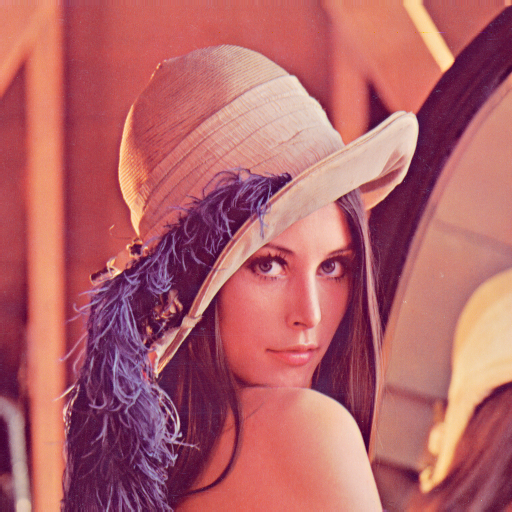

In [7]:
image = Image.open("Lenna_(test_image).png")
display(image)

In [8]:
image_array_colored= np.array(image)
print("Shape of image array:",image_array_colored.shape)

Shape of image array: (512, 512, 3)


array([[[226, 137, 125],
        [226, 137, 125],
        [223, 137, 133],
        ...,
        [179,  79,  86],
        [178,  78,  93],
        [174,  78,  87]],

       [[226, 137, 125],
        [226, 137, 125],
        [223, 137, 133],
        ...,
        [179,  79,  86],
        [178,  78,  93],
        [174,  78,  87]],

       [[226, 137, 125],
        [226, 137, 125],
        [223, 137, 133],
        ...,
        [179,  79,  86],
        [178,  78,  93],
        [174,  78,  87]],

       ...,

       [[177,  64,  79],
        [177,  64,  79],
        [163,  58,  74],
        ...,
        [177,  65,  79],
        [172,  68,  79],
        [172,  75,  83]],

       [[169,  63,  79],
        [169,  63,  79],
        [159,  53,  74],
        ...,
        [175,  70,  85],
        [178,  72,  84],
        [178,  63,  75]],

       [[166,  55,  74],
        [166,  55,  74],
        [154,  51,  71],
        ...,
        [178,  65,  78],
        [175,  67,  79],
        [177,  59,  79]]], dtype=uint8)
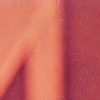

In [9]:
top_left_corner = image_array_colored[:100, :100]
display(top_left_corner)

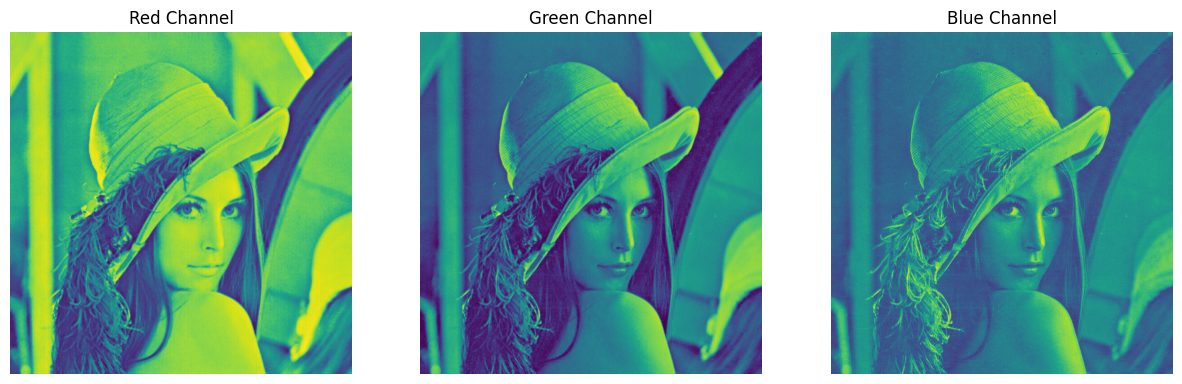

In [10]:
red=image_array_colored[:,:,0]
green=image_array_colored[:,:,1]
blue=image_array_colored[:,:,2]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(red)
axes[0].set_title("Red Channel")
axes[0].axis('off')

axes[1].imshow(green)
axes[1].set_title("Green Channel")
axes[1].axis('off')

axes[2].imshow(blue)
axes[2].axis('off')
axes[2].set_title("Blue Channel")
plt.show()

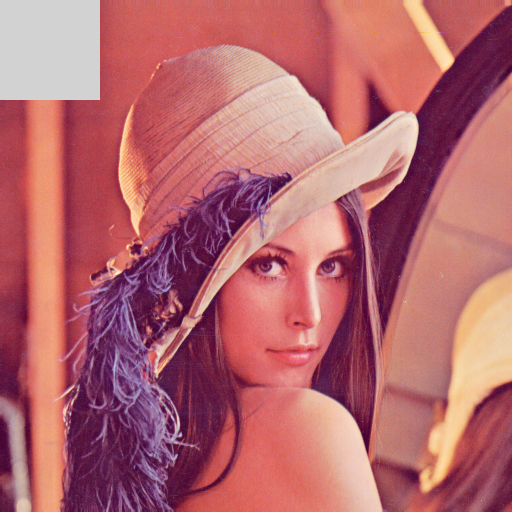

In [11]:
image_array_colored[:100,:100]=210
new_image=Image.fromarray(image_array_colored)
display(new_image)

In [12]:
uploaded= files.upload()

Saving cameraman.png to cameraman.png


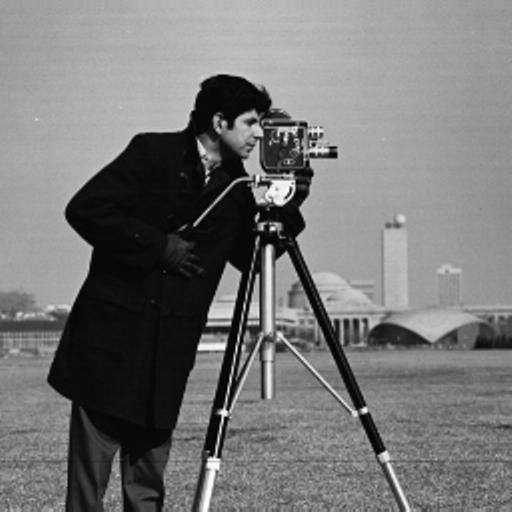

In [13]:
image=Image.open("cameraman.png")
display(image)

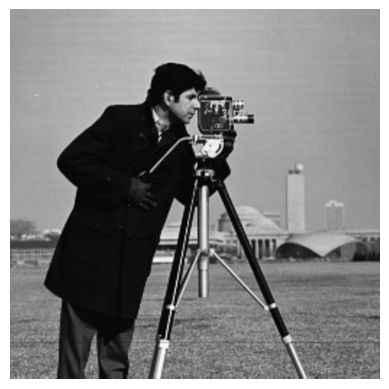

In [14]:
plt.imshow(image,cmap="gray")
plt.axis("off")
plt.show()

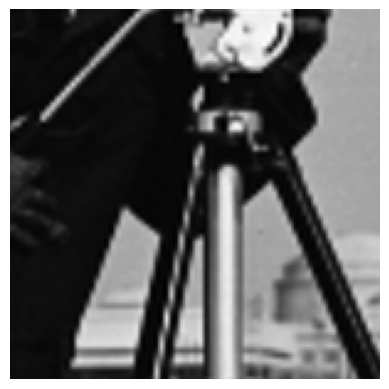

In [15]:
width, height = image.size

center_x, center_y = width // 2, height // 2
half_size = 75
left = center_x - half_size
right = center_x + half_size
top = center_y - half_size
bottom = center_y + half_size

cropped_image = image.crop((left, top, right, bottom))

cropped_image_np = np.array(cropped_image)

plt.imshow(cropped_image_np, cmap="gray")
plt.axis("off")
plt.show()

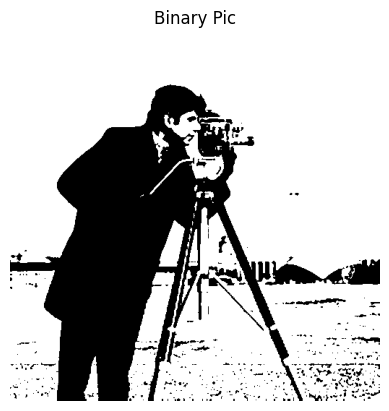

In [16]:
image_array=np.array(image)

binary_image=np.where(image_array<100,0,255)

plt.imshow(binary_image,cmap="gray")
plt.axis("off")
plt.title("Binary Pic")
plt.show()

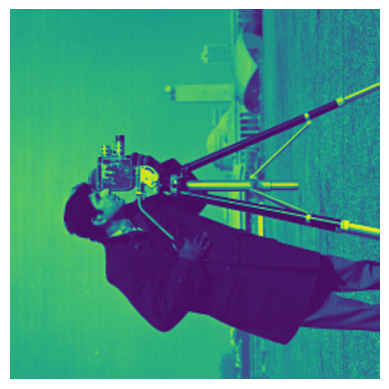

In [17]:
rotated_image= image.rotate(90)
plt.imshow(rotated_image)
plt.axis("off")
plt.show()

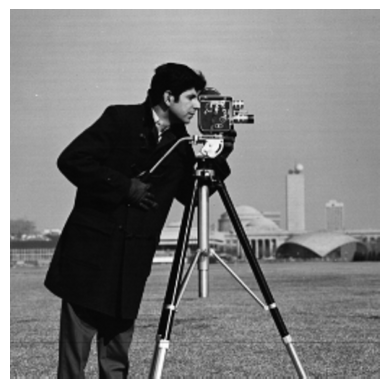

In [18]:
gray_array=np.array(image)

# Stack grayscale values into 3 channels (R, G, B)
rgb_array = np.dstack([gray_array] * 3)  # Ensures correct shape (H, W, 3)


# Convert back to PIL image
rgb_image = Image.fromarray(rgb_array)

# Display the RGB image
plt.imshow(rgb_image)
plt.axis("off")  # Hide axes
plt.show()

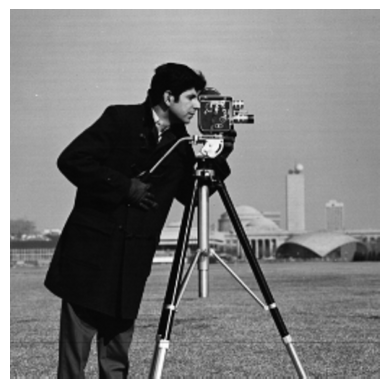

In [19]:
gray_array = np.array(image)

# Ensure gray_array is grayscale (single channel) if it's not already
if gray_array.ndim == 3:  # If it has 3 dimensions (H, W, C)
    gray_array = gray_array[:, :, 0]  # Take only the first channel (e.g., red)

# Stack grayscale values into 3 channels (R, G, B)
rgb_array = np.dstack([gray_array] * 3)  # Creates correct shape (H, W, 3)

# Convert back to PIL image
rgb_image = Image.fromarray(rgb_array.astype(np.uint8)) # converting to uint8 for PIL compatibility

# Display the RGB image
plt.imshow(rgb_image)
plt.axis("off")  # Hide axes
plt.show()

In [25]:
uploaded = files.upload()

Saving download.png to download.png


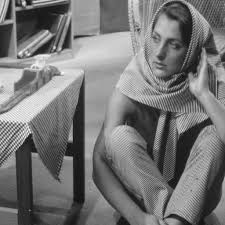

Height: 225
Width: 225


In [27]:
image=Image.open("download.png")
display(image)
image_array=np.array(image)
height, width=image_array.shape
print("Height:",height)
print("Width:",width)
data = image_array.reshape(height, width)

In [28]:
mean = np.mean(data, axis=(0, 1))
center_data = data-mean

cov_matrix=np.cov(center_data,rowvar=False)
print(cov_matrix)

[[3512.38599206 3040.16626984 2702.19617063 ...  340.72563492
   355.76684524  350.89910714]
 [3040.16626984 3432.53968254 2991.22251984 ...  301.4234127
   310.6047619   326.74107143]
 [2702.19617063 2991.22251984 3295.07313492 ...  299.31331349
   267.47166667  272.95625   ]
 ...
 [ 340.72563492  301.4234127   299.31331349 ... 1810.98206349
  1699.35380952 1437.04107143]
 [ 355.76684524  310.6047619   267.47166667 ... 1699.35380952
  1879.88678571 1643.84553571]
 [ 350.89910714  326.74107143  272.95625    ... 1437.04107143
  1643.84553571 1769.83928571]]


In [29]:
eigenvalues,eigenvectors=np.linalg.eigh(cov_matrix)
sorted=np.argsort(eigenvalues)[::-1]
eigenvalues=eigenvalues[sorted]
eigenvectors=eigenvectors[:,sorted]

k=100
components=eigenvectors[:,:k]
projected_data=np.dot(center_data,components)
print(projected_data.shape)

(225, 100)


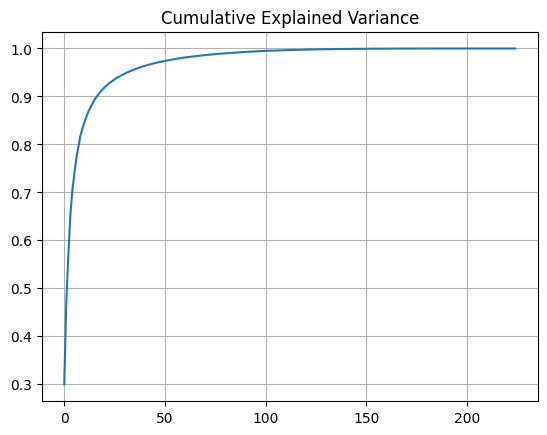

In [30]:
variance_ratio = eigenvalues/ np.sum(eigenvalues)
plt.plot(np.cumsum(variance_ratio))
plt.title("Cumulative Explained Variance")
plt.grid(True)
plt.show()

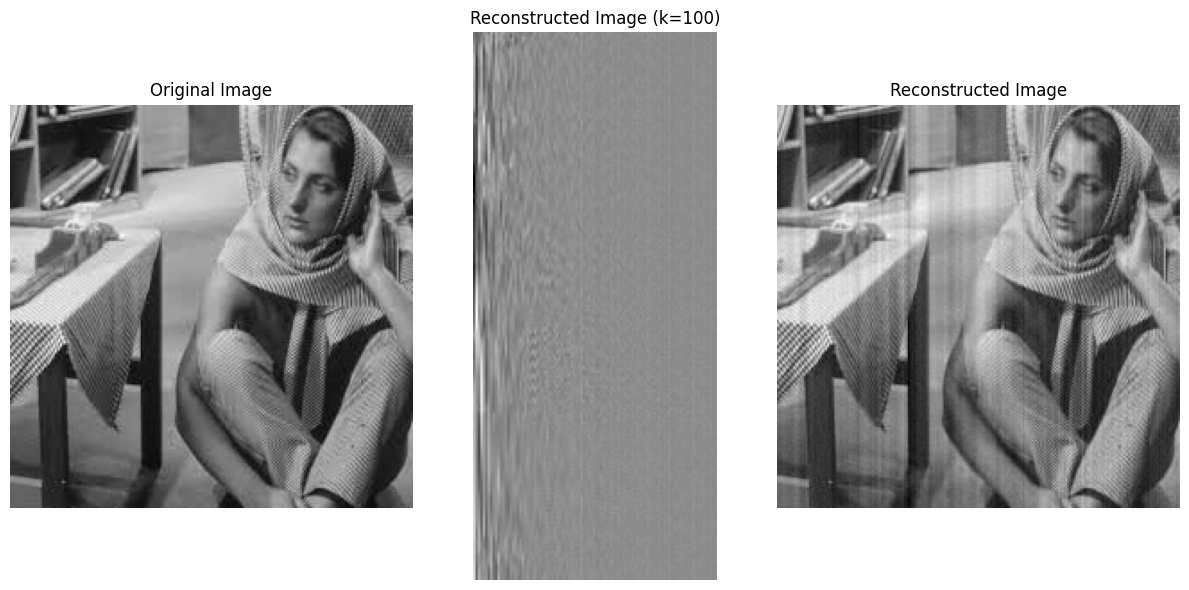

In [31]:
reconstruct_data = np.dot(projected_data, components.T)+mean

plt.figure(figsize=(12,6))

plt.subplot(1,3,1)
plt.imshow(image_array,cmap="gray")
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(projected_data,cmap="gray")
plt.title(f"Reconstructed Image (k={k})")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(reconstruct_data,cmap="gray")
plt.title("Reconstructed Image")
plt.axis("off")
plt.tight_layout()
plt.show()

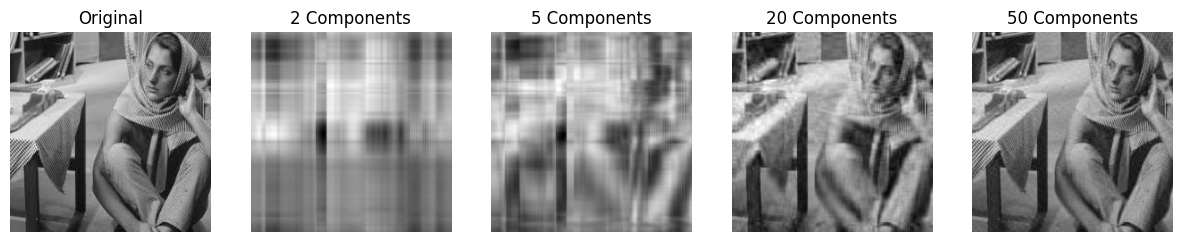

In [32]:
U, S, Vt = np.linalg.svd(image_array, full_matrices=False)

components = [2, 5, 20, 50]
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
axes[0].imshow(image_array, cmap='gray')
axes[0].set_title("Original")
axes[0].axis('off')

for i, k in enumerate(components):
    reconstructed = (U[:, :k] @ np.diag(S[:k]) @ Vt[:k, :])
    axes[i+1].imshow(reconstructed, cmap='gray')
    axes[i+1].set_title(f"{k} Components")
    axes[i+1].axis('off')

plt.show()
